In [4]:
import pandas as pd

In [5]:
import numpy as np

In [6]:
import matplotlib.pyplot as plt

In [7]:
import seaborn as sns

In [8]:
poland = pd.read_csv("poland.csv", skiprows=2)
unitedstates = pd.read_csv("unitedstates.csv", skiprows=2)
unitedkingdom = pd.read_csv("unitedkingdom.csv", skiprows=2)

In [9]:
poland

,Miesiąc,vacation: (Polska)
0,2004-01,0
1,2004-02,100
2,2004-03,0
3,2004-04,85
4,2004-05,0
...,...,...
238,2023-11,40
239,2023-12,54
240,2024-01,51
241,2024-02,61


In [10]:
unitedkingdom

,Miesiąc,vacation: (Wielka Brytania)
0,2004-01,41
1,2004-02,40
2,2004-03,44
3,2004-04,39
4,2004-05,39
...,...,...
238,2023-11,27
239,2023-12,49
240,2024-01,31
241,2024-02,29


In [11]:
unitedstates

,Miesiąc,vacation: (Stany Zjednoczone)
0,2004-01,95
1,2004-02,86
2,2004-03,82
3,2004-04,74
4,2004-05,84
...,...,...
238,2023-11,41
239,2023-12,53
240,2024-01,43
241,2024-02,42


In [12]:
poland['Miesiąc'] = pd.to_datetime(poland['Miesiąc'], format='%Y-%m')
poland.set_index('Miesiąc', inplace=True)
poland

,vacation: (Polska)
Miesiąc,
2004-01-01,0
2004-02-01,100
2004-03-01,0
2004-04-01,85
2004-05-01,0
...,...
2023-11-01,40
2023-12-01,54
2024-01-01,51


In [13]:
unitedstates['Miesiąc'] = pd.to_datetime(unitedstates['Miesiąc'], format='%Y-%m')
unitedstates.set_index('Miesiąc', inplace=True)
unitedstates

,vacation: (Stany Zjednoczone)
Miesiąc,
2004-01-01,95
2004-02-01,86
2004-03-01,82
2004-04-01,74
2004-05-01,84
...,...
2023-11-01,41
2023-12-01,53
2024-01-01,43


In [14]:
unitedkingdom['Miesiąc'] = pd.to_datetime(unitedkingdom['Miesiąc'], format='%Y-%m')
unitedkingdom.set_index('Miesiąc', inplace=True)
unitedkingdom

,vacation: (Wielka Brytania)
Miesiąc,
2004-01-01,41
2004-02-01,40
2004-03-01,44
2004-04-01,39
2004-05-01,39
...,...
2023-11-01,27
2023-12-01,49
2024-01-01,31


In [15]:
poland.rename(columns={'vacation: (Polska)': 'PL'}, inplace=True)
unitedstates.rename(columns={'vacation: (Stany Zjednoczone)':'USA'}, inplace=True)
unitedkingdom.rename(columns={'vacation: (Wielka Brytania)': 'UK'}, inplace=True)
poland

,PL
Miesiąc,
2004-01-01,0
2004-02-01,100
2004-03-01,0
2004-04-01,85
2004-05-01,0
...,...
2023-11-01,40
2023-12-01,54
2024-01-01,51


In [16]:
unitedstates

,USA
Miesiąc,
2004-01-01,95
2004-02-01,86
2004-03-01,82
2004-04-01,74
2004-05-01,84
...,...
2023-11-01,41
2023-12-01,53
2024-01-01,43


In [17]:
unitedkingdom

,UK
Miesiąc,
2004-01-01,41
2004-02-01,40
2004-03-01,44
2004-04-01,39
2004-05-01,39
...,...
2023-11-01,27
2023-12-01,49
2024-01-01,31


In [18]:
combined_data = poland.join([unitedstates, unitedkingdom], how='outer')
combined_data

,PL,USA,UK
Miesiąc,,,
2004-01-01,0,95,41
2004-02-01,100,86,40
2004-03-01,0,82,44
2004-04-01,85,74,39
2004-05-01,0,84,39
...,...,...,...
2023-11-01,40,41,27
2023-12-01,54,53,49
2024-01-01,51,43,31


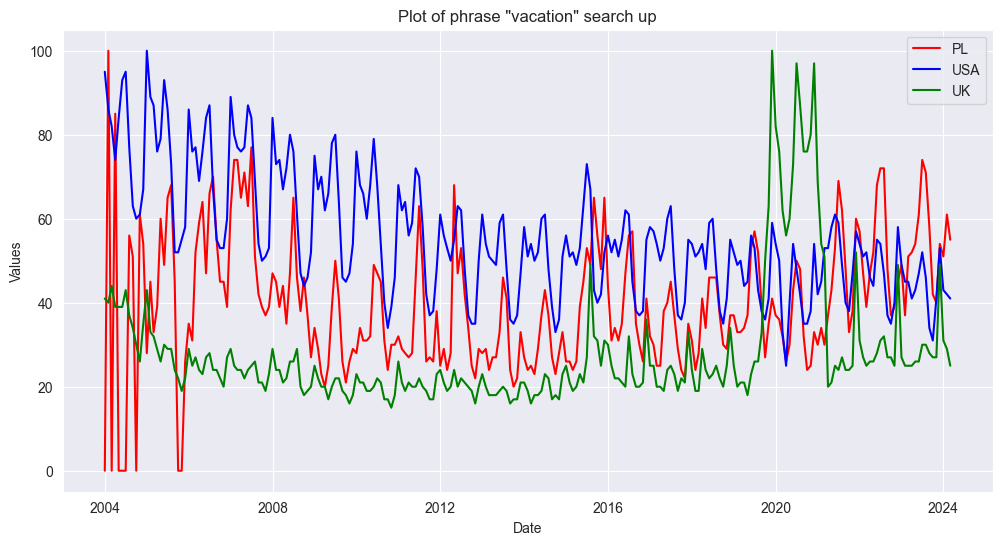

In [19]:
plt.figure(figsize=(12,6))
plt.plot(combined_data.index, combined_data['PL'], label='PL', color='red')
plt.plot(combined_data.index, combined_data['USA'], label='USA', color='blue')
plt.plot(combined_data.index, combined_data['UK'], label='UK', color='green')
plt.title('Plot of phrase "vacation" search up')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.show()

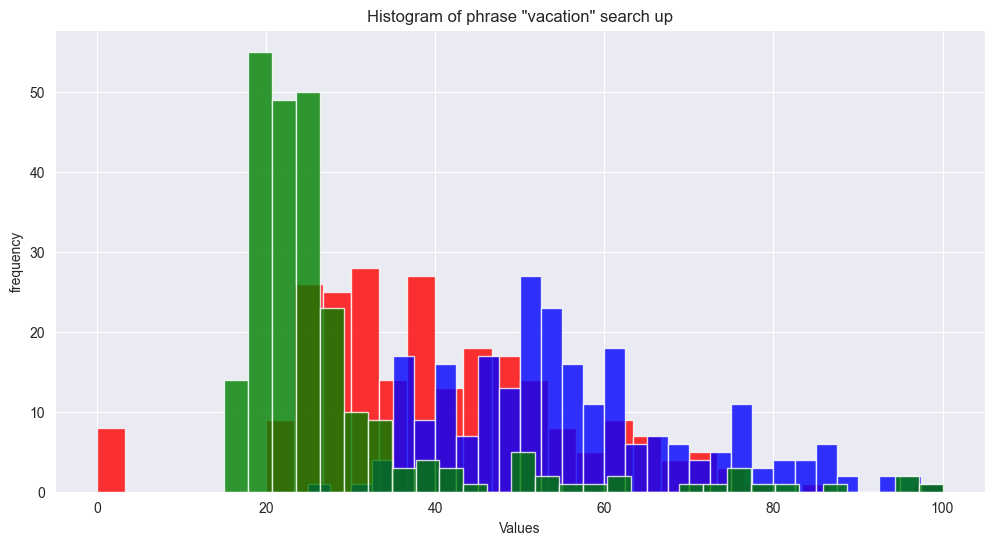

In [20]:
plt.figure(figsize=(12,6))
plt.hist(combined_data['PL'], bins=30, color='red', alpha=0.8)
plt.hist(combined_data['USA'], bins=30, color='blue', alpha=0.8)
plt.hist(combined_data['UK'], bins=30, color='green', alpha=0.8)
plt.title('Histogram of phrase "vacation" search up')
plt.xlabel('Values')
plt.ylabel('frequency')
plt.grid(True)
plt.show()

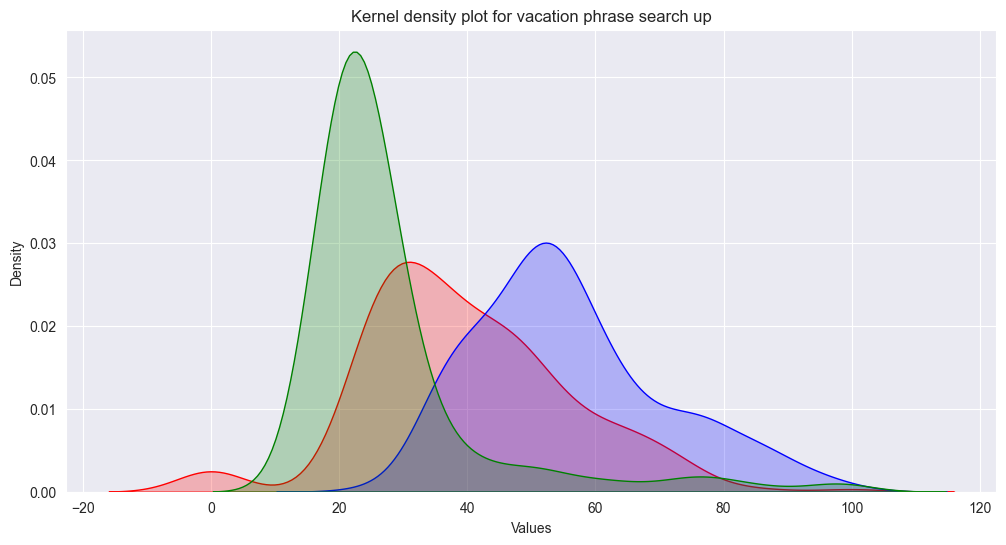

In [21]:
plt.figure(figsize=(12,6))
sns.kdeplot(combined_data['PL'], color='red', fill=True)
sns.kdeplot(combined_data['USA'], color='blue', fill=True)
sns.kdeplot(combined_data['UK'], color='green', fill=True)
plt.title('Kernel density plot for vacation phrase search up')
plt.xlabel('Values')
plt.grid(True)
plt.show()

In [23]:
combined_data.describe(include="all")

,PL,USA,UK
count,243.000000,243.000000,243.000000
mean,39.818930,55.839506,27.950617
std,15.980106,14.853936,14.735605
min,0.000000,25.000000,15.000000
25%,29.000000,45.500000,20.000000
50%,37.000000,53.000000,24.000000
75%,49.000000,63.000000,28.500000
max,100.000000,100.000000,100.000000
